In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
company = pd.read_csv("companies_new.csv")

In [3]:
company.head()

,Unnamed: 0,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,...,142,143,144,145,146,147,148,149,isClosed,active_days
0,0,acquired,2007,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732555.0
1,1,operating,2003,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6570.0
2,2,operating,2003,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6570.0
3,3,operating,2004,2011.0,2011.0,1.0,1500000.0,2010.0,2010.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6205.0
4,4,operating,2006,2007.0,2007.0,1.0,2500000.0,2010.0,2012.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5475.0


In [4]:
company.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
company

,status,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,...,142,143,144,145,146,147,148,149,isClosed,active_days
0,acquired,2007,2008.0,2008.0,1.0,5000000.0,2008.0,2012.0,3.0,14.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732555.0
1,operating,2003,2011.0,2012.0,3.0,10125293.0,2010.0,2010.0,1.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6570.0
2,operating,2003,2003.0,2003.0,1.0,250000.0,2007.0,2007.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6570.0
3,operating,2004,2011.0,2011.0,1.0,1500000.0,2010.0,2010.0,1.0,8.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6205.0
4,operating,2006,2007.0,2007.0,1.0,2500000.0,2010.0,2012.0,2.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5475.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9803,closed,2008,2008.0,2008.0,1.0,130000.0,2008.0,2009.0,2.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732920.0
9804,operating,2011,2011.0,2011.0,1.0,500000.0,2011.0,2011.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3650.0
9805,closed,2006,2008.0,2009.0,2.0,1100000.0,2005.0,2008.0,2.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,732190.0
9806,operating,2007,2008.0,2008.0,1.0,750000.0,2013.0,2013.0,1.0,14.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5110.0


## 1. Factorise

In [6]:
fact = pd.factorize(company['status']) # convert 'status'  column into numerical column

In [7]:
company['status'] = fact[0]

## 2. Mutual Information

a. Using MI to detect the most important features in the data.

b. It is more efficient than the correlation as it doesn't assume a linear relationship, instead it measures the level of uncertainty between two features.

In [8]:
from sklearn.feature_selection import mutual_info_regression

In [9]:
x = company.drop(['status'], axis=1)
y = company['status']

In [10]:
discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]
mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features, random_state=0)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [11]:
mi_scores

active_days         0.470530
isClosed            0.443524
last_funding_at     0.097976
first_funding_at    0.078928
founded_at          0.063512
                      ...   
34                  0.000000
37                  0.000000
38                  0.000000
83                  0.000000
73                  0.000000
Name: MI Scores, Length: 163, dtype: float64

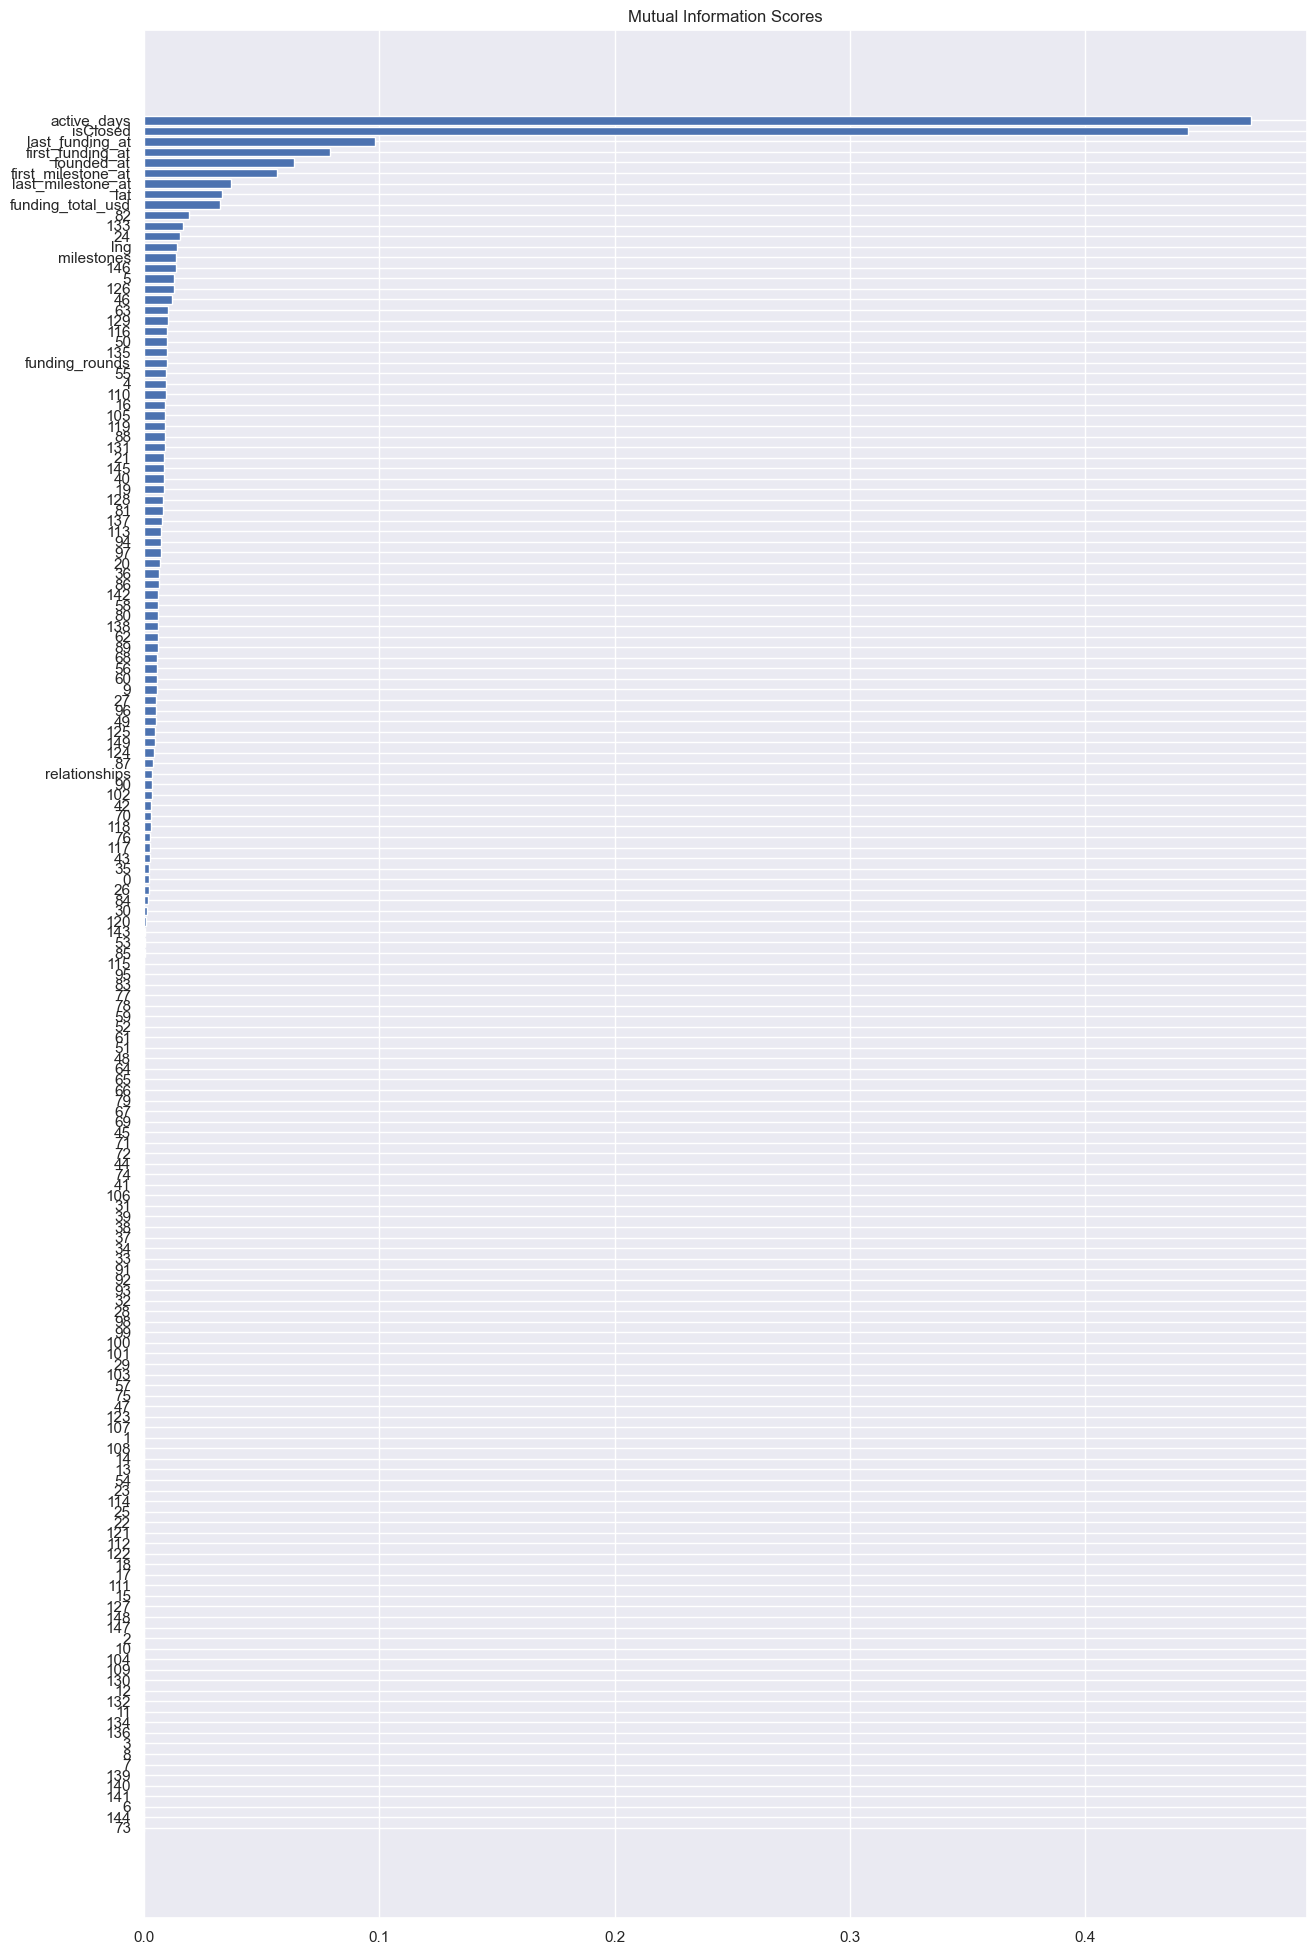

In [12]:
plt.figure(dpi=100, figsize=(15, 25))
mi_scores = mi_scores.sort_values()
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width, mi_scores)
plt.yticks(width, ticks)
plt.title("Mutual Information Scores")
plt.show()

'first_funding_at' and 'last_funding_at' have the highest scores.

## 3. Univariate Analysis

### A. Selection with SelectKBest

- select the independent features which have the strongest relationship with the dependent feature

- feature with the highest score will be more related to the dependent feature

In [13]:
#Divide the features into Independent and Dependent Variable
x = company.drop(['status'], axis=1)
y = company['status']

In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

In [15]:
#Select top 5 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =5)
selector.fit(x, y)
x.columns[selector.get_support()]

Index(['first_funding_at', 'last_funding_at', 'first_milestone_at', 'isClosed',
       'active_days'],
      dtype='object')

Almost same results as MI

### B. Selection ExtraTreesClassifier

- helps to give the importance of each independent feature with a dependent feature
- higher score means it's more important/relevant towards output variable

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
#Divide the features into Independent and Dependent Variable
x = company.drop(['status'], axis=1)
y = company['status']

In [18]:
# Building the model
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5,
                                        criterion ='entropy', max_features = 5)
  
# Training the model
extra_tree_forest.fit(x, y)
  
# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_
  
# Normalizing the individual importances
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_],
                                        axis = 0)

In [19]:
d1 = pd.DataFrame(list(feature_importance_normalized), company.columns[1:])

In [20]:
d1.sort_values(0, ascending=False).head(20)

,0
isClosed,0.259817
active_days,0.210013
last_funding_at,0.026672
first_funding_at,0.014338
last_milestone_at,0.008432
funding_total_usd,0.008070
milestones,0.006062
first_milestone_at,0.005619
lng,0.005420
relationships,0.005280


In [21]:
company = company[['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones',
       'status','isClosed']]

## 4. Data Standardization

- Used when all features are having high values, not 0 and 1.
- The mean of the independent features is 0 and the standard deviation is 1.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
#Divide the features into Independent and Dependent Variable
x = company.drop(['isClosed','status'], axis=1)

In [24]:
object= StandardScaler()

In [25]:
scale = object.fit_transform(x) 

In [26]:
#Converting numpy array to dataframe
company_norm_col = pd.DataFrame(scale, index=company.index, columns=company.columns[:-2]) 
company.update(company_norm_col)

In [27]:
company

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,status,isClosed
0,-0.113605,-0.879874,-1.306764,-0.791392,0.001246,-0.753281,0.361501,1.733481,0,0.0
1,-0.799293,0.310334,0.454866,1.970875,0.773914,-0.084546,-0.357688,-0.735943,1,1.0
2,-0.799293,-2.863553,-3.508802,-0.791392,-0.714844,-1.087648,-1.436472,-0.735943,1,1.0
3,-0.627871,0.310334,0.014459,-0.791392,-0.526399,-0.084546,-0.357688,-0.735943,1,1.0
4,-0.285027,-1.276609,-1.747172,-0.791392,-0.375644,-0.084546,0.361501,0.498769,1,1.0
...,...,...,...,...,...,...,...,...,...,...
9803,0.057816,-0.879874,-1.306764,-0.791392,-0.732935,-0.753281,-0.717283,0.498769,2,0.0
9804,0.572082,0.310334,0.014459,-0.791392,-0.677155,0.249821,0.001906,-0.735943,1,1.0
9805,-0.285027,-0.879874,-0.866356,0.589742,-0.586702,-1.756383,-1.076877,0.498769,2,0.0
9806,-0.113605,-0.879874,-1.306764,-0.791392,-0.639466,0.918555,0.721096,-0.735943,1,1.0


In [28]:
isClosed = []
for x in company['isClosed']:
    isClosed.append(int(x))

In [29]:
company['isClosed'] = isClosed

In [30]:
#Finally Save cleaned Data.
#company.index = range(0,len(company))
company.to_csv('companies_new.csv')

In [31]:
company

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,status,isClosed
0,-0.113605,-0.879874,-1.306764,-0.791392,0.001246,-0.753281,0.361501,1.733481,0,0
1,-0.799293,0.310334,0.454866,1.970875,0.773914,-0.084546,-0.357688,-0.735943,1,1
2,-0.799293,-2.863553,-3.508802,-0.791392,-0.714844,-1.087648,-1.436472,-0.735943,1,1
3,-0.627871,0.310334,0.014459,-0.791392,-0.526399,-0.084546,-0.357688,-0.735943,1,1
4,-0.285027,-1.276609,-1.747172,-0.791392,-0.375644,-0.084546,0.361501,0.498769,1,1
...,...,...,...,...,...,...,...,...,...,...
9803,0.057816,-0.879874,-1.306764,-0.791392,-0.732935,-0.753281,-0.717283,0.498769,2,0
9804,0.572082,0.310334,0.014459,-0.791392,-0.677155,0.249821,0.001906,-0.735943,1,1
9805,-0.285027,-0.879874,-0.866356,0.589742,-0.586702,-1.756383,-1.076877,0.498769,2,0
9806,-0.113605,-0.879874,-1.306764,-0.791392,-0.639466,0.918555,0.721096,-0.735943,1,1
